In [1]:
# Netflix Data Analysis Project

# Step 1: Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style="whitegrid")

# Step 2: Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Step 3: Display basic info
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Check basic dataset info
df.info()

# Check missing values
print("\nMissing Values in Each Column:\n", df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


In [2]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Fill missing values
df['director'].fillna('Not Specified', inplace=True)
df['cast'].fillna('Not Specified', inplace=True)
df['country'].fillna('Not Specified', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Verify cleaning
print("After cleaning:")
df.info()


After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


C:\Users\kugan\AppData\Local\Temp\ipykernel_4372\2174425906.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Not Specified', inplace=True)
C:\Users\kugan\AppData\Local\Temp\ipykernel_4372\2174425906.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [3]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1156,s1157,Movie,A Week Away,Roman White,"Kevin Quinn, Bailee Madison, Jahbril Cook, Kat...",United States,"March 26, 2021",2021,TV-PG,98 min,"Children & Family Movies, Faith & Spirituality...","In this uplifting musical, a troubled teen tak..."
4388,s4389,Movie,Aalorukkam,V C Abhilash,"Indrans, Sreekanth Menon, Vishnu Agasthya, Ali...",India,"November 15, 2018",2018,TV-PG,122 min,"Dramas, Independent Movies, International Movies",When an aging father seeks the help of a docto...
7959,s7960,Movie,Scooby-Doo on Zombie Island,"Hiroshi Aoyama, Kazumi Fukushima, Jim Stenstrum","Scott Innes, Billy West, Mary Kay Bergman, Fra...",United States,"December 15, 2019",1998,TV-PG,77 min,Children & Family Movies,When Daphne's TV show does a segment on real m...
8036,s8037,Movie,Sleeping with Other People,Leslye Headland,"Jason Sudeikis, Alison Brie, Adam Scott, Jason...",United States,"October 2, 2017",2015,R,101 min,"Comedies, Dramas, Independent Movies","Many years after hooking up in college, two pe..."
5623,s5624,Movie,Semana Santa,Alejandra Márquez Abella,"Tenoch Huerta, Anajosé Aldrete, Esteban Ávila,...",Mexico,"January 31, 2017",2015,TV-MA,87 min,"Dramas, International Movies","A single mother, her boyfriend and her 8-year-..."


C:\Users\kugan\AppData\Local\Temp\ipykernel_4372\2698487189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


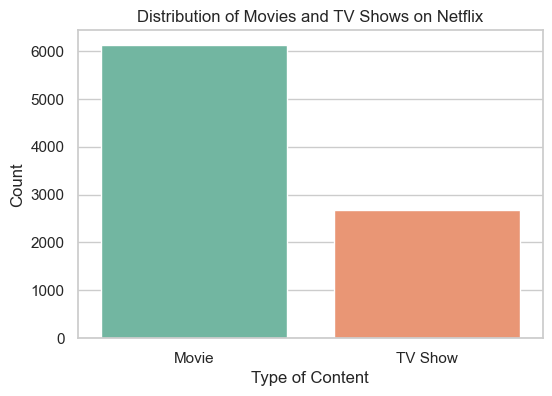

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [4]:
# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

# Count values
df['type'].value_counts()


C:\Users\kugan\AppData\Local\Temp\ipykernel_4372\3728372559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_count.values, y=country_count.index, palette='coolwarm')


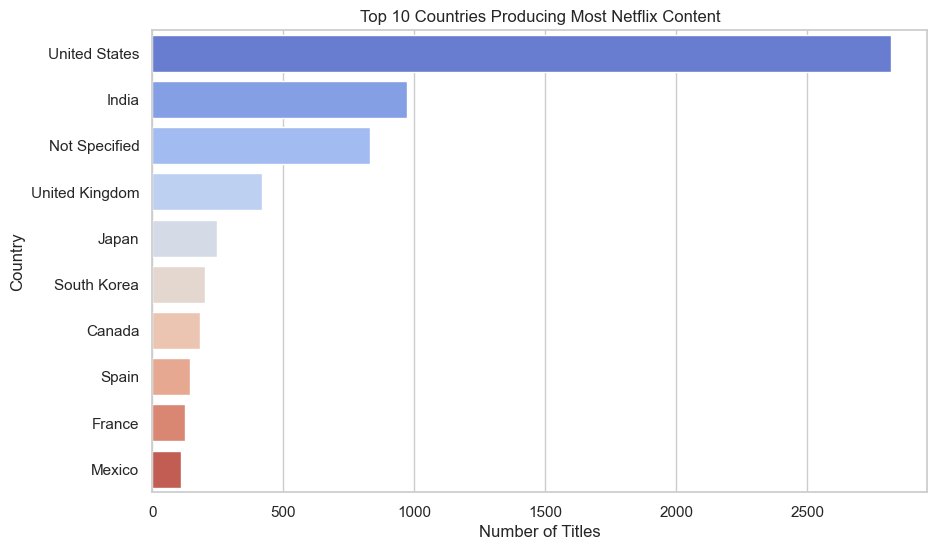

In [7]:
plt.figure(figsize=(10,6))
country_count = df['country'].value_counts().head(10)
sns.barplot(x=country_count.values, y=country_count.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


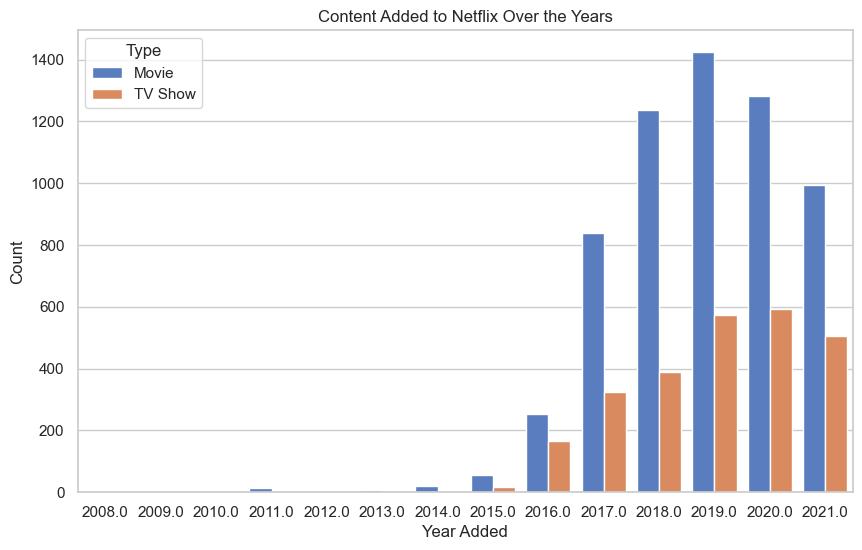

In [8]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year_added', hue='type', palette='muted')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper left')
plt.show()


C:\Users\kugan\AppData\Local\Temp\ipykernel_4372\125932161.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Count', y='Genre', palette='mako')


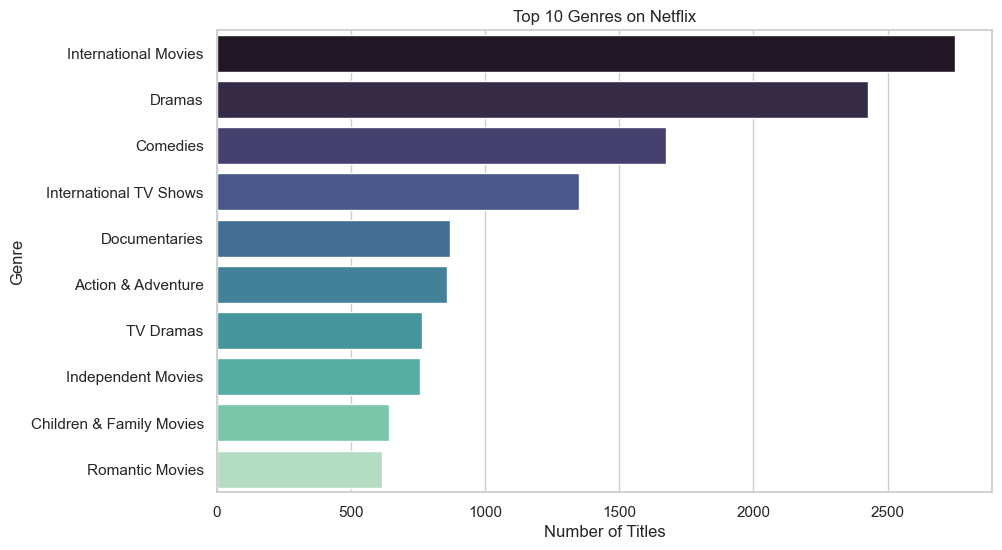

In [9]:
# Split the 'listed_in' column (genres) and count frequency
from collections import Counter

genre_list = df['listed_in'].dropna().str.split(', ')
genre_count = Counter([genre for sublist in genre_list for genre in sublist])

# Top 10 genres
top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='mako')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


C:\Users\kugan\AppData\Local\Temp\ipykernel_4372\2446414037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='rocket')


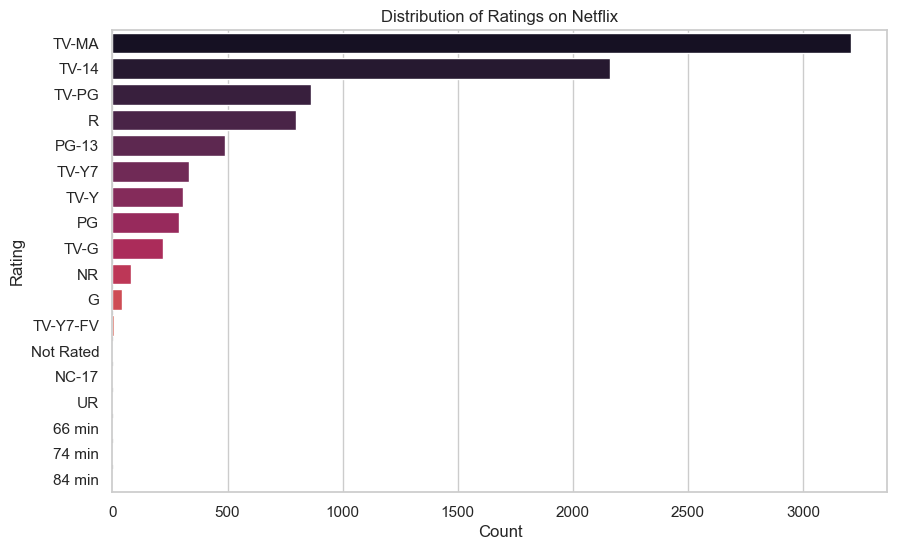

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='rocket')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show() 

C:\Users\kugan\AppData\Local\Temp\ipykernel_4372\2433380724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='flare')


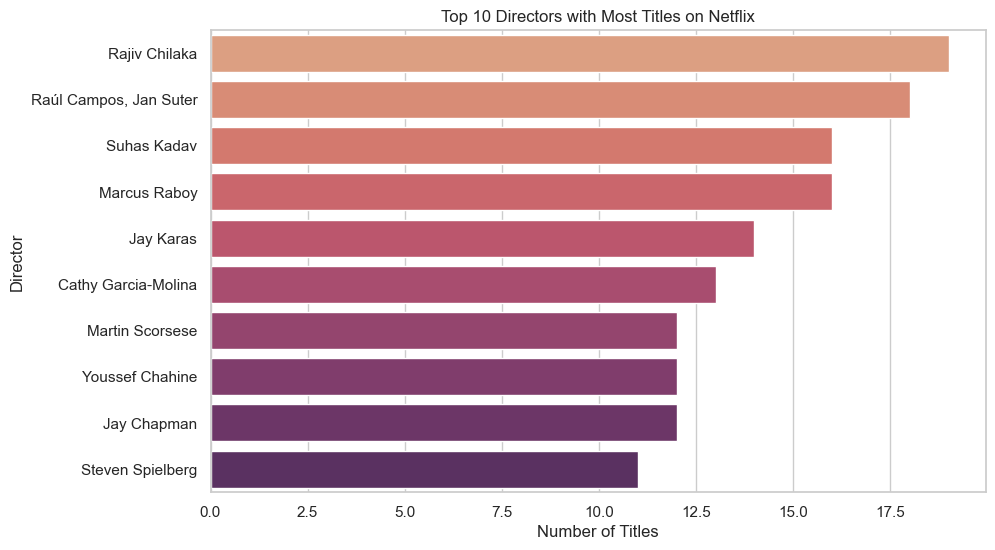

In [13]:
plt.figure(figsize=(10,6))
top_directors = df[df['director'] != 'Not Specified']['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='flare')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()
